In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

#import seaborn as sns

In [47]:
import numpy as np
import h5py
from corner import corner
#from getdist import plots, MCSamples
#import getdist
from chainconsumer import ChainConsumer
from glob import glob

In [48]:
#test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'
#test_files = sorted(glob('../preds/*scattering*mcmc.hdf5'))
test_files = sorted(glob('/u/ki/swmclau2/des/uatu_preds/*scattering*mcmc.hdf5'))

In [49]:
print test_files

['/u/ki/swmclau2/des/uatu_preds/uatu_scattering_emu_mcmc.hdf5', '/u/ki/swmclau2/des/uatu_preds/uatu_scattering_s1_emu_mcmc.hdf5']


In [50]:
#test_names = ['Adv. Resnet', 'Shuffled Resnet', 'Resnet', 'Gupta']
#test_names = ['Adv. Resnet', 'Resnet', 'Gupta']
test_names = ['MCMC' for i in xrange(2)]

In [51]:
def get_outputs(test_path):

    with h5py.File(test_path, 'r') as f:
        output = f['chain'][500*500:, :]
    return output, None

In [52]:
plot_idx = 0
outputs, truths = get_outputs(test_files[plot_idx])

In [53]:
names = ['Om', 's8']

In [54]:
outputs.max(axis=0)

array([0.3335242, 0.9373632], dtype=float32)

In [55]:
c = ChainConsumer()

for name, tf in zip(test_names, test_files):#[1:-1]:
    outputs, _ = get_outputs(tf)
    outputs = outputs#[100*1000:]
    print outputs.shape
    c.add_chain(outputs, parameters=names, name = name)

(250000, 2)
(250000, 2)


In [56]:
c.configure(kde=[False for _ in xrange(len(test_files))])#, shade_alpha=0.1, flip=False)

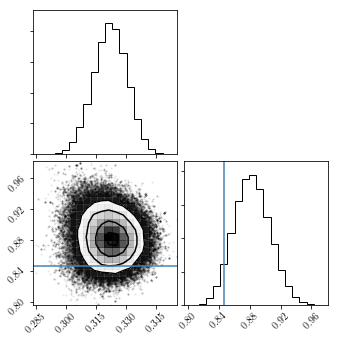

In [57]:
corner(outputs, truths=[0.279925, 0.846988]);

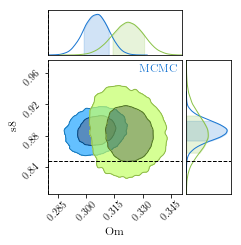

In [58]:
truth = [0.279925, 0.846988]
c.plotter.plot(figsize='GROW', truth=truth);